In [8]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

In [9]:
df=load_boston()

In [10]:
data=pd.DataFrame(df.data)

In [11]:
data.columns=df.feature_names

In [12]:
data["Price"]=df.target

In [13]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
x=data.drop('Price', axis=1)
y=data['Price']

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

### Linear Regression

In [18]:
lr=LinearRegression()

In [19]:
mse=cross_val_score(lr, x, y, scoring='neg_mean_squared_error')
mean_mse=np.mean(mse)
mean_mse

-37.13180746769874

### Lasso Regression

In [20]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [21]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error')

lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-35.53158022069486


### Ridge Regression

In [26]:
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error')

ridge_regressor.fit(x,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.9057019475402


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [28]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

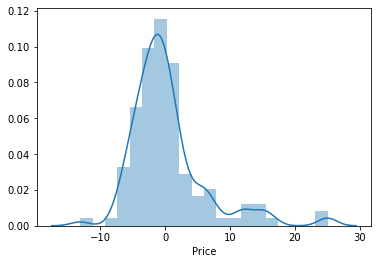

In [29]:
import seaborn as sns

sns.distplot(y_test-prediction_lasso)

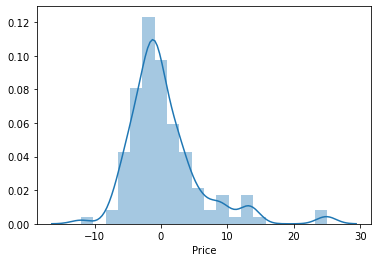

In [30]:
sns.distplot(y_test-prediction_ridge)